In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install "numpy<2"

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Python Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from prePro_dropCol import drop_col
from prePro_conVal import convert_val

# Import data set file
# Make sure your datasets are uploaded under this package folder -> Capstone proj/src/data folder and right click, select "Copy Path"
ds_PCOSwoInfer = pd.read_excel(r'C:\Users\robig\OneDrive\Documents\000 AIM - POSTGRAD AI & ML COURSE\PILLAR 5\Capstone Proj\src\data\PCOS_data_without_infertility.xlsx')
ds_PCOSwInfer = pd.read_csv(r'C:\Users\robig\OneDrive\Documents\000 AIM - POSTGRAD AI & ML COURSE\PILLAR 5\Capstone Proj\src\data\PCOS_infertility.csv')

In [3]:
# Merge both datasets and check to remove the same columns
primCol = input("Enter primary column: ") # In this dataset its "Patient File No."
dataSet = pd.merge(ds_PCOSwoInfer, ds_PCOSwInfer, on=primCol, how='left')

df_dataSet = pd.DataFrame(dataSet)
df_dataSet.columns
df_dataSet.head()
df_dataSet.isnull().sum()

Sl. No_x                      0
Patient File No.              0
PCOS (Y/N)_x                  0
 Age (yrs)                    0
Weight (Kg)                   0
Height(Cm)                    0
BMI                           0
Blood Group                   0
Pulse rate(bpm)               0
RR (breaths/min)              0
Hb(g/dl)                      0
Cycle(R/I)                    0
Cycle length(days)            0
Marraige Status (Yrs)         1
Pregnant(Y/N)                 0
No. of aborptions             0
  I   beta-HCG(mIU/mL)_x      0
II    beta-HCG(mIU/mL)_x      0
FSH(mIU/mL)                   0
LH(mIU/mL)                    0
FSH/LH                        0
Hip(inch)                     0
Waist(inch)                   0
Waist:Hip Ratio               0
TSH (mIU/L)                   0
AMH(ng/mL)_x                  0
PRL(ng/mL)                    0
Vit D3 (ng/mL)                0
PRG(ng/mL)                    0
RBS(mg/dl)                    0
Weight gain(Y/N)              0
hair gro

In [4]:
#Dropping the repeated features after merging
#Ensure that the features/columns that you place in the colDrop variable are the ones without data or are duplicates
colDrop = ['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y']

df_dataSet = drop_col(df_dataSet, colDrop)

#Taking a look at the dataset
df_dataSet.head()
df_dataSet.isnull().sum()
df_dataSet.isna()

,Sl. No_x,Patient File No.,PCOS (Y/N)_x,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
538,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
539,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sl. No_x                  541 non-null    int64  
 1   Patient File No.          541 non-null    int64  
 2   PCOS (Y/N)_x              541 non-null    int64  
 3    Age (yrs)                541 non-null    int64  
 4   Weight (Kg)               541 non-null    float64
 5   Height(Cm)                541 non-null    float64
 6   BMI                       541 non-null    float64
 7   Blood Group               541 non-null    int64  
 8   Pulse rate(bpm)           541 non-null    int64  
 9   RR (breaths/min)          541 non-null    int64  
 10  Hb(g/dl)                  541 non-null    float64
 11  Cycle(R/I)                541 non-null    int64  
 12  Cycle length(days)        541 non-null    int64  
 13  Marraige Status (Yrs)     540 non-null    float64
 14  Pregnant(Y

In [6]:
for col in df_dataSet: # This tries to convert all values to numeric, with non-convertible values becoming NaN
   df_dataSet[col] = pd.to_numeric(df_dataSet[col], errors='coerce')

df_dataSet.isna().sum()

# Optionally, convert all columns to a consistent float type if needed
# Will also convert integer-only columns to float
df_dataSet = df_dataSet.astype(float)

print("\nModified mixed dtypes (all float):")
print(df_dataSet.dtypes)


Modified mixed dtypes (all float):
Sl. No_x                    float64
Patient File No.            float64
PCOS (Y/N)_x                float64
 Age (yrs)                  float64
Weight (Kg)                 float64
Height(Cm)                  float64
BMI                         float64
Blood Group                 float64
Pulse rate(bpm)             float64
RR (breaths/min)            float64
Hb(g/dl)                    float64
Cycle(R/I)                  float64
Cycle length(days)          float64
Marraige Status (Yrs)       float64
Pregnant(Y/N)               float64
No. of aborptions           float64
  I   beta-HCG(mIU/mL)_x    float64
II    beta-HCG(mIU/mL)_x    float64
FSH(mIU/mL)                 float64
LH(mIU/mL)                  float64
FSH/LH                      float64
Hip(inch)                   float64
Waist(inch)                 float64
Waist:Hip Ratio             float64
TSH (mIU/L)                 float64
AMH(ng/mL)_x                float64
PRL(ng/mL)                  

In [7]:
# To check which features have NaN values
print(convert_val(df_dataSet))

['Marraige Status (Yrs)', 'II    beta-HCG(mIU/mL)_x', 'AMH(ng/mL)_x', 'Fast food (Y/N)']


In [ ]:
#make sure to do this command first before using SimpleImputer
!pip install -U scikit-learn 

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.0 MB 5.6 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.0 MB 9.2 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.0 MB 10.2 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.0 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1


  You can safely remove it manually.


In [9]:
from sklearn.impute import SimpleImputer

# Impute with the mean
# Replace NaN values with values depending on strategy value (mean, median, etc.)
strat = input("Enter the strategy for SimpleImpute: ") # mean for this case

imputer = SimpleImputer(missing_values=np.nan, strategy=strat)

for col in df_dataSet.columns:
    if df_dataSet[col].hasnans:
        df_dataSet[col] = imputer.fit_transform(df_dataSet[[col]])

print("Columns with NaNs:", convert_val(df_dataSet)) # Verify if there are still values that have NaN

Columns with NaNs: []


In [10]:
from scipy import stats
# Identify outliers
dCopy = df_dataSet.copy()

for i in dCopy.columns:
  # Calculate Z-scores
  dCopy['z_score'] = np.abs(stats.zscore(dCopy[i]))

outliers = dCopy[dCopy['z_score'] > 3]

print(f"There are {len(outliers)} rows of outliers in the dataset")
print('\n')
print("Outliers using Z-Score method:\n", outliers)


There are 6 rows of outliers in the dataset


Outliers using Z-Score method:
      Sl. No_x  Patient File No.  PCOS (Y/N)_x   Age (yrs)  Weight (Kg)  \
38       39.0              39.0           0.0        36.0         53.0   
39       40.0              40.0           0.0        20.0         74.0   
47       48.0              48.0           0.0        26.0         40.0   
77       78.0              78.0           0.0        34.0         52.0   
82       83.0              83.0           0.0        39.0         52.0   
211     212.0             212.0           1.0        39.0         55.0   

     Height(Cm)         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  \
38         158.0  21.230572         13.0              78.0              22.0   
39         171.0  25.306932         13.0              74.0              16.0   
47         156.0  16.436555         13.0              74.0              18.0   
77         150.0  23.111111         11.0              72.0              18.0   
82 

In [ ]:
# Feature Explainability using SHAP
pip install shap

SyntaxError: invalid syntax (2124772843.py, line 2)

In [11]:
import shap
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier

df_dataSet.columns

slNo = df_dataSet['Sl. No_x']
patientNo = df_dataSet['Patient File No.']
targetPcos = df_dataSet['PCOS (Y/N)_x']

#df_dataSet = df_dataSet.drop(['Sl. No_x', 'Patient File No.', 'PCOS (Y/N)_x', 'z_score'], axis=1)
df_dataSet = df_dataSet.drop(['Sl. No_x', 'Patient File No.', 'PCOS (Y/N)_x'], axis=1)

# Scale the data
sclr = StandardScaler()
df_dataSet = sclr.fit_transform(df_dataSet)
df_dataSet = pd.DataFrame(df_dataSet, columns = sclr.get_feature_names_out())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_dataSet, targetPcos, test_size=0.2, random_state=42)

In [12]:
# Select top 15 features using Chi-Square
best_features = SelectKBest(score_func=chi2, k=15)
fit = best_features.fit(abs((X_train)), y_train)

# Get selected feature names
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(abs((X_train)).columns)
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['PCOS Features', 'Score']
print(feature_scores.nlargest(15, 'Score'))

               PCOS Features      Score
9         Cycle length(days)  26.697161
16                LH(mIU/mL)  23.591649
37          Follicle No. (R)  22.694877
36          Follicle No. (L)  21.911196
28          hair growth(Y/N)  19.778066
29      Skin darkening (Y/N)  16.794696
22              AMH(ng/mL)_x  16.319741
8                 Cycle(R/I)  14.830857
24            Vit D3 (ng/mL)  14.280263
25                PRG(ng/mL)   8.202470
13    I   beta-HCG(mIU/mL)_x   7.269313
15               FSH(mIU/mL)   5.895688
27          Weight gain(Y/N)   5.208743
17                    FSH/LH   4.415960
38      Avg. F size (L) (mm)   4.304213


In [ ]:
pip install xgboost catboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.0/72.0 MB 8.5 MB/s eta 0:00:09
   - -------------------------------------- 3.4/72.0 MB 10.1 MB/s eta 0:00:07
   --- ------------------------------------ 5.5/72.0 MB 10.2 MB/s eta 0:00:07
   ---- ----------------------------------- 7.9/72.0 MB 10.6 MB/s eta 0:00:07
   ----- ---------------------------------- 9.7/72.0 MB 10.1 MB/s eta 0:00:07
   ------ --------------------------------- 11.5/72.0 MB 9.8 MB/s eta 0:00:07
   ------- -------------------------------- 13.9/72.0 MB 10.0 MB/s eta 0:00:06
   -------- ------------------------------- 16.0/72.0 MB 10.1 MB/s eta 0:00:06
   ---------- ----------------------------- 18.4/72.0 MB 10.1 MB/s eta 0:00:06
   ----------- ---------------------------- 20.2/72.0 MB 10.0 MB/s eta 0:00:06
   ------------ --------------------------- 21.8/72.0 MB 9.8 MB/s eta 0:00:06
   ------------ --------------------------- 22.8/72.0 MB 9.5 MB/s eta

In [13]:
from modelSelect import modSel

modSel(X_train, y_train, X_test, y_test)

Random Forest Accuracy: 87.16%
Random Forest Mean Squared Error: 12.84%

SVM Accuracy: 88.07%
SVM Mean Squared Error: 11.93%

XGBoost Accuracy: 88.07%
XGBoost Mean Squared Error: 11.93%

CatBoost Accuracy: 86.24%
CatBoost Mean Squared Error: 13.76%



In [ ]:
!pip install shap scikit-learn pandas numpy matplotlib

^C


(109, 41)
Shape of X: (432, 41)

 Beeswarm SHAP Plot


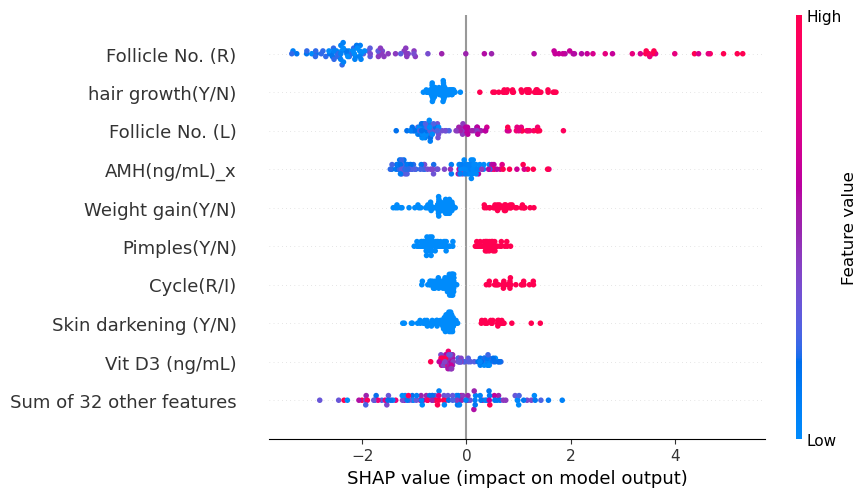


 Summary SHAP Plot


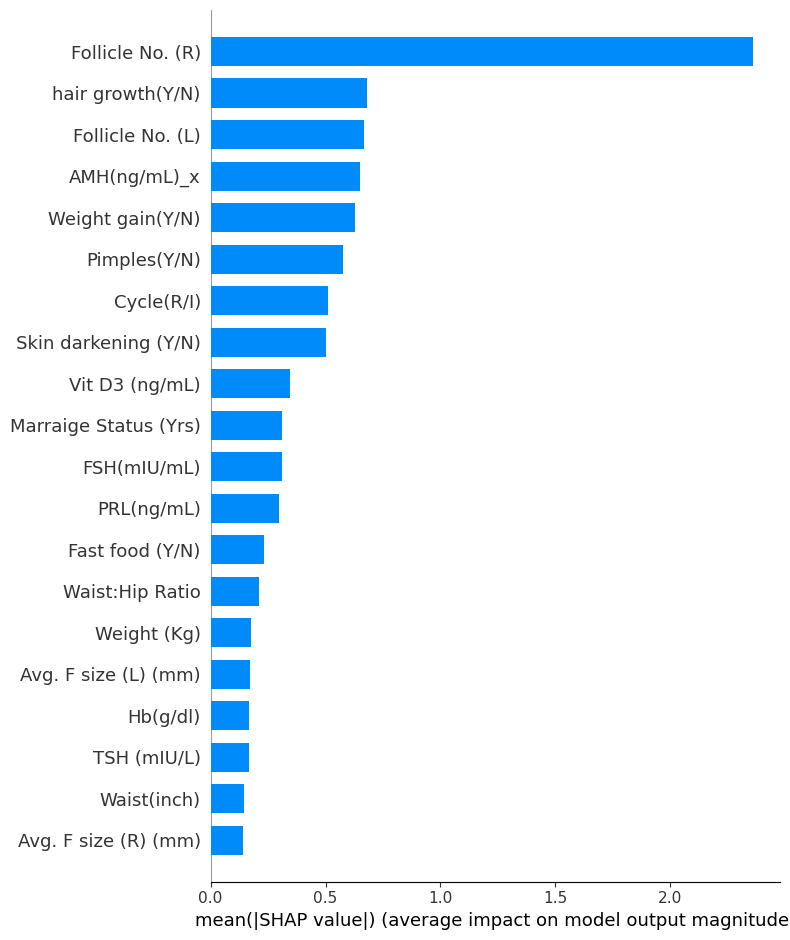


 Waterfall SHAP Plot


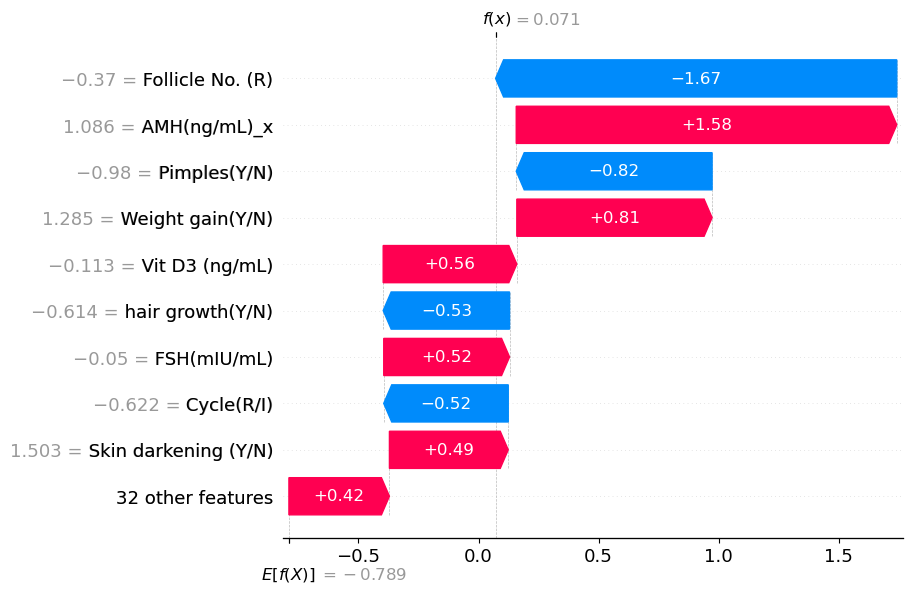

In [14]:
from shap_xai import shap_process

shap_process(X_train, y_train, X_test, y_test)

In [ ]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade scikit-learn imbalanced-learn yellowbrick

  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.3
    Uninstalling imbalanced-learn-0.12.3:
      Successfully uninstalled imbalanced-learn-0.12.3
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN

print(f'Original dataset shape: {Counter(targetPcos)}')

# 2. Initialize the SMOTEENN object
# 'auto' sampling strategy means it oversamples all classes but the majority
# class to achieve a balance.
smenn = SMOTEENN(random_state=42)

# 3. Apply the fit_resample method to the data
X_resampled, y_resampled = smenn.fit_resample(df_dataSet, targetPcos)

# 4. Check the new class distribution
print(f'Resampled dataset shape: {Counter(y_resampled)}')

Original dataset shape: Counter({0.0: 364, 1.0: 177})
Resampled dataset shape: Counter({1.0: 313, 0.0: 254})


In [ ]:
import platform
import sys
import numpy
import scipy
import sklearn
import imblearn

print("Platform:", platform.platform())
print("Python", sys.version)
print("NumPy", numpy.__version__)
print("SciPy", scipy.__version__)
print("Scikit-Learn", sklearn.__version__)
print("Imbalanced-learn", imblearn.__version__)

Platform: Windows-11-10.0.26200-SP0
Python 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
NumPy 1.26.4
SciPy 1.13.1
Scikit-Learn 1.8.0
Imbalanced-learn 0.14.1


In [16]:
from feat import featureSelect

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

featureSelect(X_train, X_test, y_train, y_test)

c:\Users\robig\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [04:35:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\robig\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [04:35:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\robig\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [04:35:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\robig\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [04:35:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

Optimal number of features: 27
Best cross-validation score (accuracy): 0.9758
Selected features mask: [ True  True  True  True False  True False  True  True  True False False
 False  True False  True False  True False  True  True False  True False
 False  True  True  True  True  True False  True  True  True False  True
  True  True  True  True False]

Model Accuracy with XGBoost's selected features: 0.956140350877193 or 95.61%



c:\Users\robig\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [04:35:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Optimal number of features: 18
Best cross-validation score (accuracy): 0.9868
Selected features mask: [ True False False False False False False False  True  True False False
 False  True False False False  True False  True  True False  True False
 False  True False  True  True  True False  True  True False False False
  True  True  True  True False]

Model Accuracy with Random Forest's selected features: 0.9473684210526315 or 94.74%



In [17]:
from hyperparam_gridS import grid
grid(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Test accuracy of the best model: 0.9649122807017544


In [18]:
from hyperparam_randS import rand
rand(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
Test accuracy of the best model: 0.9649122807017544


In [17]:
pip install fairlearn

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------- ----------- 1.0/1.5 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
import re

# Example data loading and preprocessing (replace with your data steps)
# df = pd.read_csv('your_dataset.csv')
# ... one-hot encoding ...
X_train, X_test, y_train, y_test = train_test_split(df_dataSet, targetPcos, test_size=0.3, random_state=42)

X_train.columns = [re.sub(r'[,{}\[\]":]', '_', col) for col in X_train.columns]
X_test.columns = [re.sub(r'[,{}\[\]":]', '_', col) for col in X_test.columns]
#y_train.columns = [re.sub(r'[,{}\[\]":]', '_', col) for col in y_train.columns]
#y_test.columns = [re.sub(r'[,{}\[\]":]', '_', col) for col in y_test.columns]

clf = LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

sensitive_feat = X_test[' Age (yrs)'] # Example using ? as the sensitive feature


from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate
from sklearn.metrics import recall_score

# Check the difference in recall score across groups
gm = MetricFrame(metrics=recall_score, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_feat)
print("Recall by group:\n", gm.by_group)

# Check the selection rate (proportion of positive predictions) across groups
sr = MetricFrame(metrics=selection_rate, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_feat)
print("Selection rate by group:\n", sr.by_group)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 124, number of negative: 254
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1616
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328042 -> initscore=-0.717053
[LightGBM] [Info] Start training from score -0.717053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\robig\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\robig\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\robig\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\robig\anaconda3\Lib\site-packages\sklearn\metrics\_classification.p